# Applied Project 
## Leveraging Machine Learning Models to Predict Airline Passenger Satisfaction

In [53]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prediction model related libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### Import Datasets 

In [54]:
train_df = pd.read_csv('/Users/zinpwint/Desktop/SG SUSS/2nd sem/04. ANL588 Applied Project/#Hailey_Applied_Project/train.csv')
test_df = pd.read_csv('/Users/zinpwint/Desktop/SG SUSS/2nd sem/04. ANL588 Applied Project/#Hailey_Applied_Project/test.csv')

In [55]:
# Combine those two dataset into one
combined_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

combined_df.to_csv("combined.csv", index=False)

combined_df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [56]:
# Check for the data type and missing values 
combined_df = combined_df.drop('Unnamed: 0', axis =1)
combined_df.info()

# Create a DataFrame to store the info
info_df = pd.DataFrame({
    'Column Name': combined_df.columns,
    'Data Type': combined_df.dtypes,
    'Non-Null Count': combined_df.notna().sum(),  # Count non-missing values
    'Total Count': len(combined_df) # Total number of rows
})

# Reset the index to make 'Column Name' a regular column
info_df = info_df.reset_index(drop=True)

# Save the info DataFrame to a CSV
info_df.to_csv("figure1.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

Data types needs to be reassigned, but found some missing values in 'Arriaval Delay in Minutes'. 

In [57]:
combined_df.shape

(129880, 24)

In [58]:
combined_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### General Data Preparation

* Updating the data types 
* Handling missing values 
* Check for duplicate rows
* Check for outliers 
* Feature Engineering

#### Updating the data types 


In [59]:
# Changed to Category type
combined_df['id'] = combined_df['id'].astype('category')
combined_df['Gender'] = combined_df['Gender'].astype('category')
combined_df['Customer Type'] = combined_df['Customer Type'].astype('category')
combined_df['Type of Travel'] = combined_df['Type of Travel'].astype('category')
combined_df['Class'] = combined_df['Class'].astype('category')
combined_df['satisfaction'] =combined_df['satisfaction'].astype('category')

In [60]:
# Changed to int type
combined_df['Age'] = combined_df['Age'].astype('int')
combined_df['Flight Distance'] = combined_df['Flight Distance'].astype('int')
combined_df['Departure Delay in Minutes'] = combined_df['Departure Delay in Minutes'].astype('int')
combined_df['Arrival Delay in Minutes'] = combined_df['Arrival Delay in Minutes'].astype('float')

In [61]:
# Changed to categorical variables in a logical order
categories = [1, 2, 3, 4, 5]

# Convert specified columns to ordered categorical types
columns_to_order = [
        'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'
]

# Convert to categorical
for column in columns_to_order: 
       combined_df[column] = pd.Categorical(combined_df[column], categories=categories, ordered=True)

# Show the updated data types 
print ("\nUpdated Data Types:\n", combined_df.dtypes)


Updated Data Types:
 id                                   category
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                          category
Departure De

In [62]:
combined_df['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

#### Handling missing values 

In [63]:
# Count missing values per column
print(combined_df.isnull().sum())

# Count total rows with missing values
missing_rows = combined_df.isnull().any(axis=1).sum()
print(f"Total rows with missing values: {missing_rows}")

id                                      0
Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                3916
Departure/Arrival time convenient    6681
Ease of Online booking               5682
Gate location                           1
Food and drink                        132
Online boarding                      3080
Seat comfort                            1
Inflight entertainment                 18
On-board service                        5
Leg room service                      598
Baggage handling                        0
Checkin service                         1
Inflight service                        5
Cleanliness                            14
Departure Delay in Minutes              0
Arrival Delay in Minutes              393
satisfaction                      

Total rows with missing values is resulted as 10,676. Based on the nature of the attribute, I divided into two groups; the service rating related columns and 'Arrival Delay in Minute' column.  
* Service rating related columns: The reason of missing values in the service related columns means the data which are not applicable. For that, I will use the imputation method by replacing those missing values with 'mode' values. 
* 'Arrival Delay in Minute' column: I checked the percentage of missing rows for that columns. 
    * Method 1: Since, it is 393 rows (which is 0.3% of the whole dataset), I decided to drop it to simplify the process. 
    * Method 2: Blank value in Arrival Delay can probably mean that there is no arrival delay. So, I checked the departure delay for those blank data for arrival delay. If departure delay is zero, the arrival delay is also most likely to be zero. So, I will impute zero for those rows where departure delay is also zero, and the rest missing rows will be removed (only 0.19%). Method 2 was chosen to handle missing values.

#### Checking logic for service ratings columns

In [64]:
# Imputation with 'Mode' values for service rating columns 

for column in columns_to_order: 
    mode_value = combined_df[column].mode()[0]
    combined_df[column] = combined_df[column].fillna(mode_value)

#### Handling Missing values for Arrival Delay column

In [65]:
## Checking correlation between departure and arrival delay

correlation = combined_df['Arrival Delay in Minutes'].corr(combined_df['Departure Delay in Minutes'])
print(f"Correlation between Arrival Delay and Departure Delay: {correlation:.2f}")


Correlation between Arrival Delay and Departure Delay: 0.97


In [66]:
# Impute 0 for arrival delay where departure delay is 0
combined_df.loc[combined_df['Departure Delay in Minutes']==0, 'Arrival Delay in Minutes'] = 0 

In [67]:
# Calculate the Percentage of Missing Rows for 'Arrival Delay in Minutes'

# Total number of rows
total_rows = combined_df.shape[0]

# Number of rows with missing values
missing_rows = combined_df['Arrival Delay in Minutes'].isnull().sum()

# Percentage of rows with missing values
missing_percentage = (missing_rows / total_rows) * 100

print(f"Total rows: {total_rows}")
print(f"Missing rows for 'Arrival Delay in Minutes': {missing_rows}")
print(f"Percentage of rows with missing values: {missing_percentage:.2f}%")

Total rows: 129880
Missing rows for 'Arrival Delay in Minutes': 246
Percentage of rows with missing values: 0.19%


Since the % of rows with missing values is relatively small which is only 0.19%, I decided to drop those rows. 

In [68]:
# Remove rows with missing values
data_cleaned = combined_df.dropna(subset=['Arrival Delay in Minutes'])

print(f"Remaining rows after dropping: {data_cleaned.shape[0]}")

Remaining rows after dropping: 129634


#### Check for Duplicates

In [69]:
# Check for duplicate rows
duplicate_rows = data_cleaned.duplicated().sum()
duplicate_rows

0

#### Check for Outliers

In [70]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_cleaned[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].quantile(0.25)
Q3 = data_cleaned[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = (data_cleaned[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] < lower_bound) | (data_cleaned[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] > upper_bound)

# Display the outliers
print("\nNumbers of Outliers for each column:\n",outliers.sum())  # The number of outliers for each column


Numbers of Outliers for each column:
 Age                               0
Flight Distance                2850
Departure Delay in Minutes    17970
Arrival Delay in Minutes      20248
dtype: int64


#### Distribution plot to check outliers 

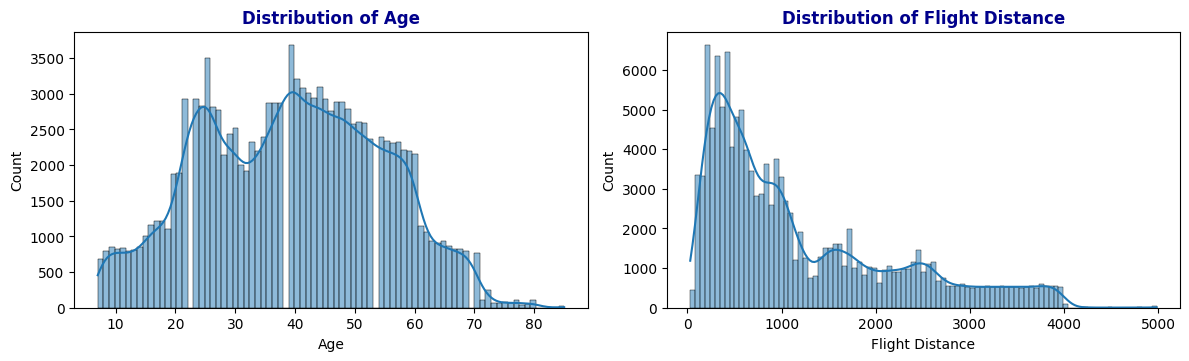

In [71]:
# Distribution of Age and Flight distance 

age_flight = ['Age', 'Flight Distance'] 

plt.figure(figsize=(12, 20))
for i, feature in enumerate(age_flight):
    plt.subplot(6, 2, i+1)
    sns.histplot(data_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=12, fontweight='bold', color='darkblue')

plt.tight_layout()
plt.show()

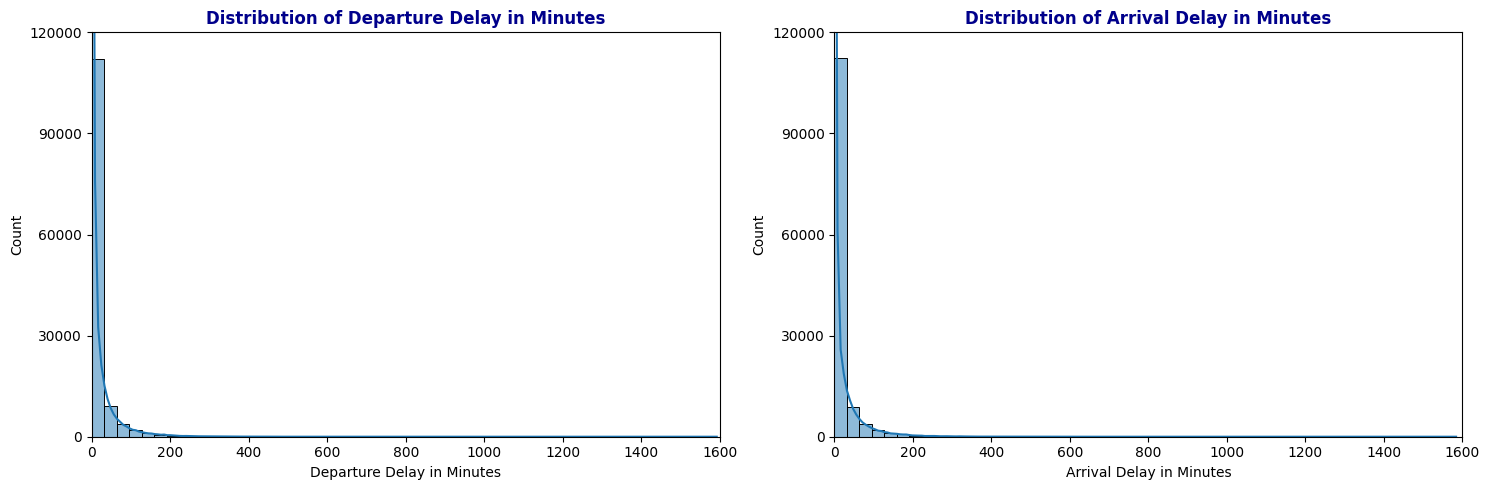

In [72]:
# Distribution of Delay figures 

# Define the delay features
delay_features = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Set figure size 
plt.figure(figsize=(15, 5))  

# Loop through delay features to create histograms
for i, feature in enumerate(delay_features):
    plt.subplot(1, 2, i+1)  
    
    # Create histogram with Kernel Density Estimation (KDE)
    sns.histplot(data_cleaned[feature], bins=50, kde=True)

    # Set title with styling
    plt.title(f'Distribution of {feature}', fontsize=12, fontweight='bold', color='darkblue')

    # Adjust x-axis limit 
    plt.xlim(0, 1600)

    # Adjust y-axis limit 
    plt.ylim(0, 120000)

    # Set y-axis ticks at 30,000 intervals
    plt.yticks(range(0, 120001, 30000))  

plt.tight_layout() 
plt.show()

#### Remove outliers (beyond 1.5x IQR)

In [73]:
# Remove outliers

data_cleaned = data_cleaned[
    (data_cleaned['Flight Distance'] >= lower_bound['Flight Distance']) & (data_cleaned['Flight Distance'] <= upper_bound['Flight Distance']) &
    (data_cleaned['Departure Delay in Minutes'] >= lower_bound['Departure Delay in Minutes']) & 
    (data_cleaned['Departure Delay in Minutes'] <= upper_bound['Departure Delay in Minutes']) &
    (data_cleaned['Arrival Delay in Minutes'] >= lower_bound['Arrival Delay in Minutes']) & 
    (data_cleaned['Arrival Delay in Minutes'] <= upper_bound['Arrival Delay in Minutes'])
]

In [74]:
# Justification

outliers_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Identify outliers
outliers_check = (data_cleaned[outliers_features] < lower_bound[outliers_features]) | (data_cleaned[outliers_features] > upper_bound[outliers_features])

# Display the number of outliers per column
print("\nNumber of Outliers for each column:\n", outliers_check.sum())



Number of Outliers for each column:
 Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64


In [75]:
data_cleaned.shape

(105376, 24)

#### Feature Engineering 

<li> Total Delay = Departure Delay in Minutes + Arrival Delay in Minutes 
<li> Age Group = Create categorical age groups, like (7-25 yr old: "Young Adult", 26-44 yr old: "Adult," 45+ yr old: "Old Adult")

In [76]:
# Total Delay 
data_cleaned['total_delay'] = data_cleaned['Arrival Delay in Minutes'].fillna(0) + data_cleaned['Departure Delay in Minutes']

In [77]:
# Age Group (binning) 
bins = [0, 25, 44, float('inf')]  
labels = ["Young Adult", "Adult", "Old Adult"]

data_cleaned['Age Group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

### Descriptive Statistics for numerical columns

In [78]:
# Get the descriptive statistics
descriptive_statistics = data_cleaned.describe()
print(descriptive_statistics)

# Save the descriptive statistics to a CSV file
descriptive_statistics.to_csv('data_cleaned_descriptive_statistics.csv')

                 Age  Flight Distance  Departure Delay in Minutes  \
count  105376.000000    105376.000000               105376.000000   
mean       39.381235      1131.873074                    3.170115   
std        15.166919       923.980295                    6.361164   
min         7.000000        31.000000                    0.000000   
25%        27.000000       406.000000                    0.000000   
50%        40.000000       817.000000                    0.000000   
75%        51.000000      1670.000000                    3.000000   
max        85.000000      3739.000000                   30.000000   

       Arrival Delay in Minutes    total_delay  
count             105376.000000  105376.000000  
mean                   2.081850       5.251964  
std                    5.178222      10.742483  
min                    0.000000       0.000000  
25%                    0.000000       0.000000  
50%                    0.000000       0.000000  
75%                    0.000000    

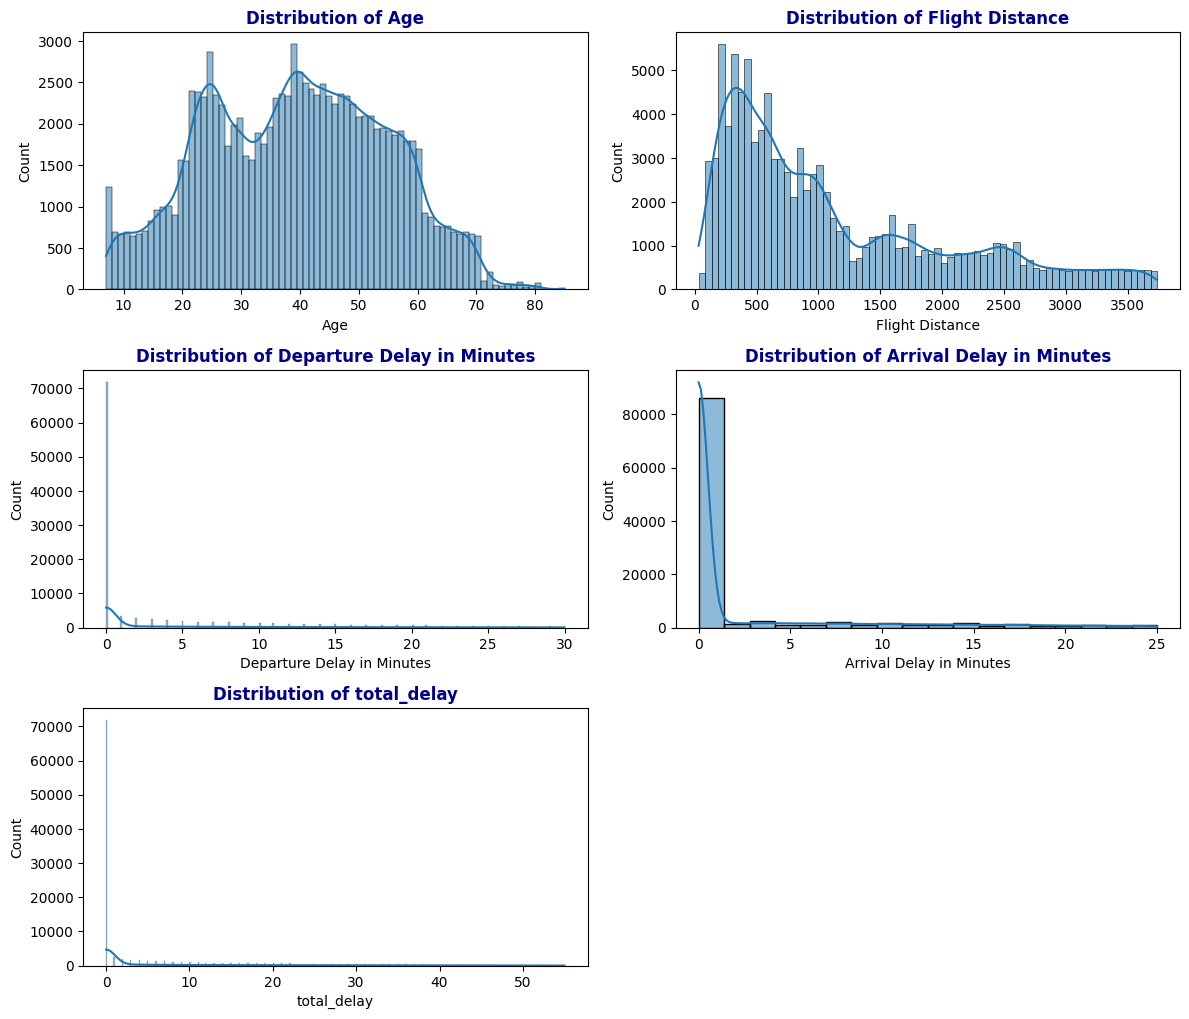

In [79]:
descriptive_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'total_delay']

plt.figure(figsize=(12, 20))
for i, feature in enumerate(descriptive_features):
    plt.subplot(6, 2, i+1)
    sns.histplot(data_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=12, fontweight='bold', color='darkblue')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

In EDA, several visualization will be performed to have better understanding towards the dataset. 

* Fig1: Correlation Heatmap for Numerical Attribute
* Fig2: Satisfaction by Age Group
* Fig3: Satisfaction by Travel Class
* Fig4: Distribution of Flight Distance by Satisfaction Level

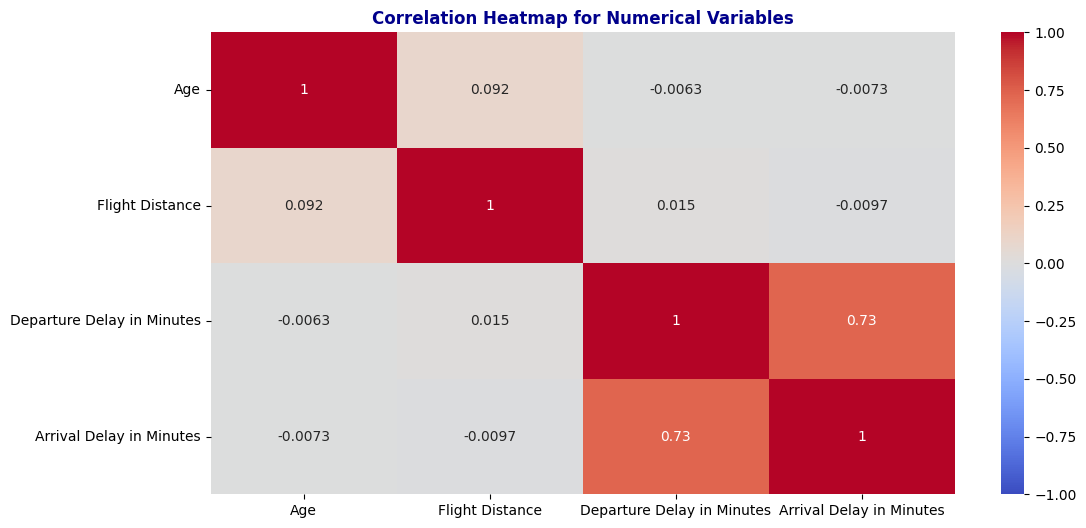

In [80]:
# Fig1: Correlation Heatmap

numeric_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Visualize the correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(data_cleaned[numeric_features].corr(), annot = True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables", fontsize=12, fontweight='bold', color="darkblue")
plt.show()

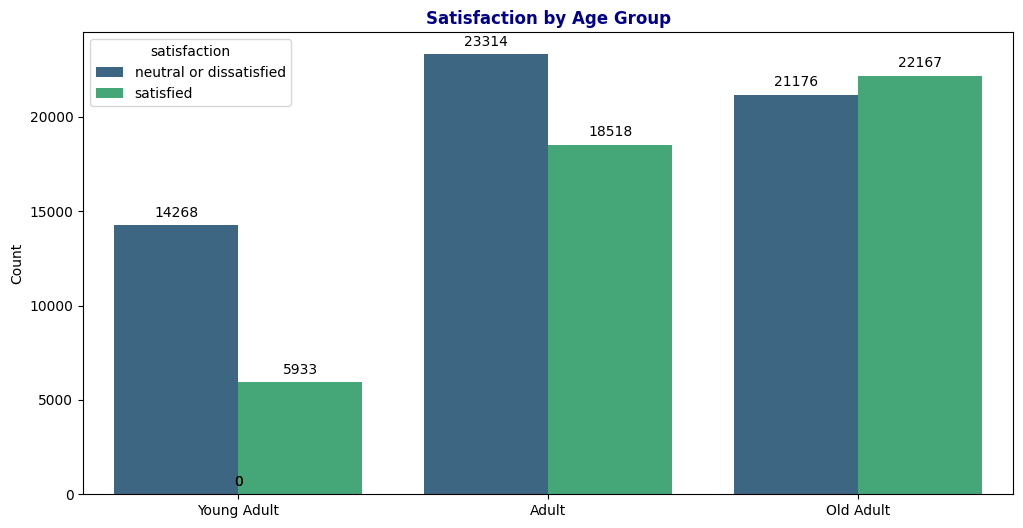

In [ ]:
#Fig2: Satisfaction by Age Group

# Calculate count
counts_by_age = data_cleaned.groupby(['Age Group', 'satisfaction']).size().reset_index(name='Count')

# Create a bar plot for counts
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=counts_by_age, x='Age Group', y='Count', hue='satisfaction', palette='viridis')

# Add title and labels
plt.title('Satisfaction by Age Group', fontsize=12, fontweight='bold', color="darkblue")
plt.xlabel("")
plt.ylabel('Count', fontsize=10)

# Annotate bars with counts
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=10, color='black')

# Remove grid lines
plt.grid(False)
plt.show()

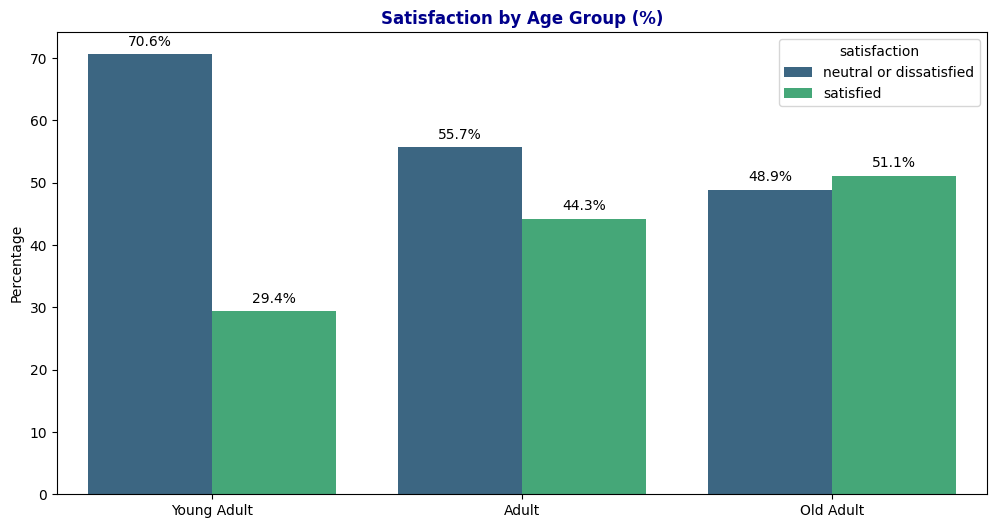

In [82]:
# Calculate count
counts_by_age = data_cleaned.groupby(['Age Group', 'satisfaction']).size().reset_index(name='Count')

# Calculate percentages within each age group
total_counts = counts_by_age.groupby('Age Group')['Count'].transform('sum')
counts_by_age['Percentage'] = (counts_by_age['Count'] / total_counts) * 100

# Create a bar plot for percentages
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=counts_by_age, x='Age Group', y='Percentage', hue='satisfaction', palette='viridis')

# Add title and labels
plt.title('Satisfaction by Age Group (%)', fontsize=12, fontweight='bold', color="darkblue")
plt.xlabel("")
plt.ylabel('Percentage', fontsize=10)

# Annotate bars with percentages (excluding 0.0%)
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        bar_plot.annotate(format(height, '.1f') + '%', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points',
                          fontsize=10, color='black')

# Remove grid lines
plt.grid(False)
plt.show()

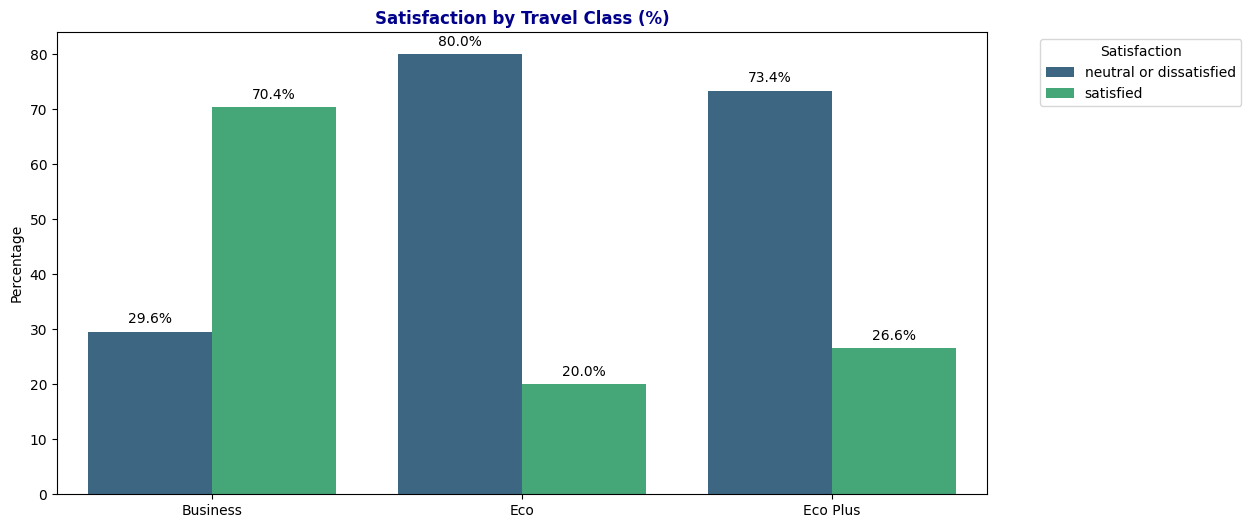

In [ ]:
# Fig3: Satisfaction by Travel Class

# Calculate count
counts_by_class = data_cleaned.groupby(['Class', 'satisfaction']).size().reset_index(name='Count')

# Calculate percentages within each age group
total_counts = counts_by_class.groupby('Class')['Count'].transform('sum')
counts_by_class['Percentage'] = (counts_by_class['Count'] / total_counts) * 100

# Create a bar plot for percentages
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=counts_by_class, x='Class', y='Percentage', hue='satisfaction', palette='viridis')

# Add title and labels
plt.title('Satisfaction by Travel Class (%)', fontsize=12, fontweight='bold', color="darkblue")
plt.xlabel("")
plt.ylabel('Percentage', fontsize=10)

# Annotate bars with percentages (excluding 0.0%)
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        bar_plot.annotate(format(height, '.1f') + '%', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points',
                          fontsize=10, color='black')

# Move legend outside to prevent overlap
plt.legend(title="Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Remove grid lines
plt.grid(False)
plt.show()

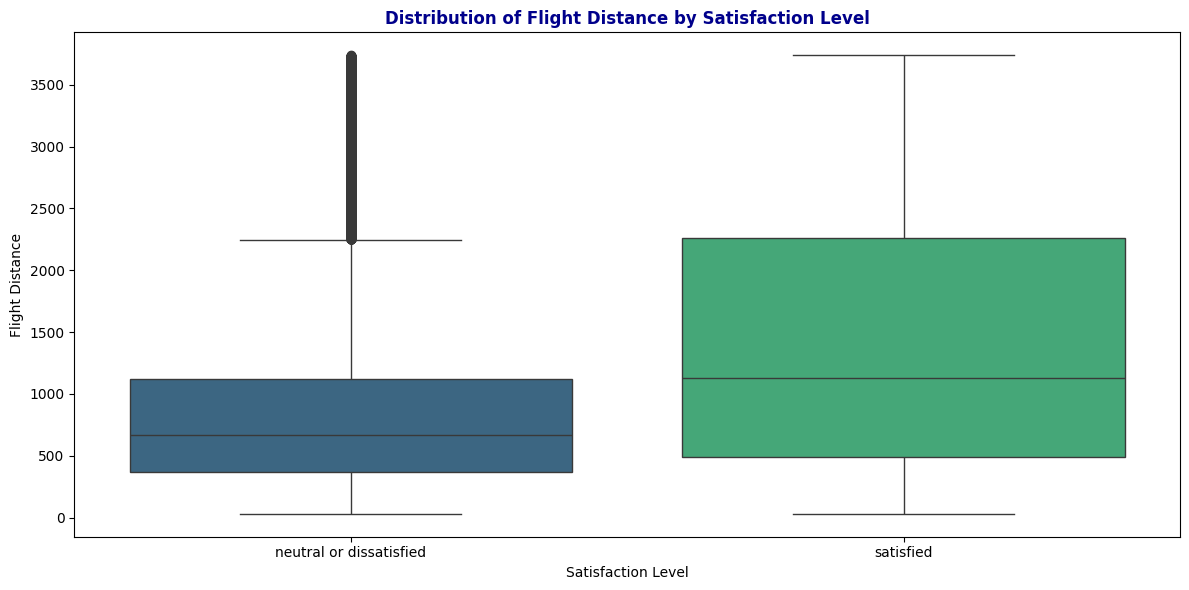

In [ ]:
# Fig4: Distribution of Flight Distance by Satisfaction Level

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='satisfaction', y='Flight Distance', palette='viridis')
plt.title('Distribution of Flight Distance by Satisfaction Level', fontsize=12, fontweight='bold', color="darkblue")
plt.xlabel('Satisfaction Level', fontsize=10)
plt.ylabel('Flight Distance', fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

In [85]:
# Satisfaction details (group by type of travel, class)
                                                                                                            
satisfaction_detail = data_cleaned.groupby(["Type of Travel", "Class"])['satisfaction'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
satisfaction_detail

,Type of Travel,Class,satisfaction,Percentage
0,Business travel,Business,satisfied,73.103100
1,Business travel,Business,neutral or dissatisfied,26.896900
2,Business travel,Eco,neutral or dissatisfied,68.483228
3,Business travel,Eco,satisfied,31.516772
4,Business travel,Eco Plus,neutral or dissatisfied,57.763191
5,Business travel,Eco Plus,satisfied,42.236809
6,Personal Travel,Business,neutral or dissatisfied,87.114338
7,Personal Travel,Business,satisfied,12.885662
8,Personal Travel,Eco,neutral or dissatisfied,88.660620
9,Personal Travel,Eco,satisfied,11.339380


In [86]:
# Pivot the data to create the heatmap structure:
heatmap_data = satisfaction_detail.pivot_table(index=['Type of Travel', 'Class'], 
                                               columns='satisfaction', 
                                               values='Percentage')
heatmap_data

satisfaction              neutral or dissatisfied  satisfied
Type of Travel  Class                                       
Business travel Business                26.896900  73.103100
                Eco                     68.483228  31.516772
                Eco Plus                57.763191  42.236809
Personal Travel Business                87.114338  12.885662
                Eco                     88.660620  11.339380
                Eco Plus                90.050952   9.949048

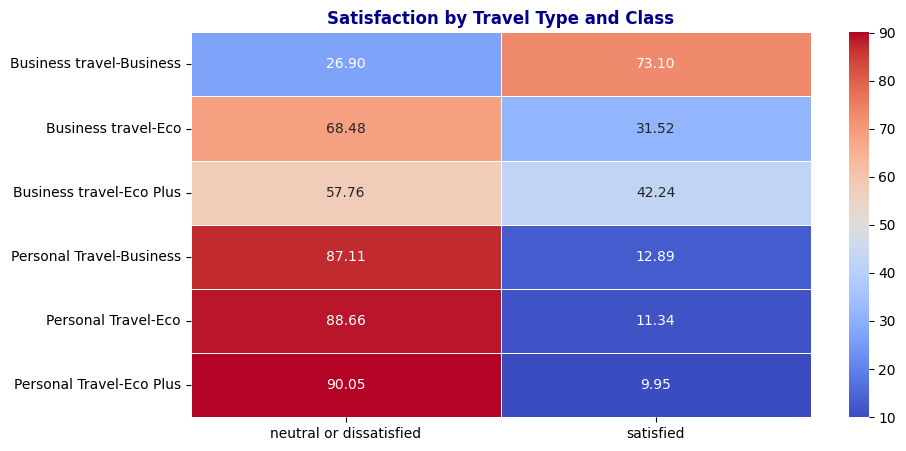

In [ ]:
# Passenger Satisfaction Heatmap based on Type of Travel and Class

plt.figure(figsize=(10, 5))  
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

plt.title('Satisfaction by Travel Type and Class', fontsize=12, fontweight='bold', color='darkblue')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)  
plt.yticks(rotation=0)  
plt.show()

## Data Preparation for Predictive Model

Following three tasks are performed to set up for predictive models. 
    <li>Defining target and features variables
    <li> One Hot Encoding
    <li>Data Normalization for numerical columns
    <li> Splitting data into training and testing set
    <li> Checking Imbalance dataset for y_train

### Defining target and features variables
This step includes dropping the unnecessary columns for the model, creating dummy variables for categorical variables and assigning the target variables. 

In [88]:
# Drop the unnecessary columns for a model
columns_to_drop = ['id', 'total_delay', 'Age Group']

predictive_df = data_cleaned.drop((columns_to_drop), axis=1)
predictive_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


#### One-Hot encoding for Category Variables 

Encoding technique for logistic regression model should be treated differently by using 'drop_first=True' while one-hot encoding to avoid the multicollinearity issue. 
Using drop_first=True due to the following reasons;

<li> Logistic regression is a linear model, and one-hot encoding creates dummy variable trap issues (perfect multicollinearity).
<li> Dropping the first category removes redundancy and avoids this issue, ensuring the model can properly estimate coefficients.


In [89]:
# Filter those needed features and target label
target = 'Satisfaction'

# Create dummy variables for categorical variables 
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

##### One-hot encoding using 'drop_first=False' for KNN, Decision Tree and Random Forest model

In [90]:
# Perform one-hot encoding for categorical variables with 'drop_first=False' 
encoded_df = pd.get_dummies(predictive_df, columns = categorical_columns, drop_first=False)

# Revert the ordered category columns back to numerical
for column in columns_to_order:
    encoded_df[column] = encoded_df[column].astype(int)

# Ensure no non-numeric columns remain
assert encoded_df.select_dtypes(include=['object']).empty, "There are still non-numeric columns present."

# Check the dtypes after conversion
print(encoded_df.dtypes)
encoded_df

Age                                       int64
Flight Distance                           int64
Inflight wifi service                     int64
Departure/Arrival time convenient         int64
Ease of Online booking                    int64
Gate location                             int64
Food and drink                            int64
Online boarding                           int64
Seat comfort                              int64
Inflight entertainment                    int64
On-board service                          int64
Leg room service                          int64
Baggage handling                          int64
Checkin service                           int64
Inflight service                          int64
Cleanliness                               int64
Departure Delay in Minutes                int64
Arrival Delay in Minutes                float64
Gender_Female                              bool
Gender_Male                                bool
Customer Type_Loyal Customer            

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,True,True,False,False,True,False,False,True,True,False
1,25,235,3,2,3,3,1,3,1,1,...,True,False,True,True,False,True,False,False,True,False
2,26,1142,2,2,2,2,5,5,5,5,...,False,True,False,True,False,True,False,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,False,True,False,True,False,True,False,False,True,False
4,61,214,3,3,3,3,4,5,5,3,...,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,...,True,False,True,True,False,True,False,False,True,False
129876,23,646,4,4,4,4,4,4,4,4,...,True,True,False,True,False,True,False,False,False,True
129877,17,828,2,5,1,5,2,1,2,2,...,False,True,False,False,True,False,True,False,True,False
129878,14,1127,3,3,3,3,4,4,4,4,...,True,True,False,True,False,True,False,False,False,True


##### One-hot encoding using 'drop_first=True' for Logisitc Regression Model 

In [91]:
# Perform one-hot encoding for categorical variables with 'drop_first=True' 
encoded_df_lrm = pd.get_dummies(predictive_df, columns = categorical_columns, drop_first=True)

# Revert the ordered category columns back to numerical
for column in columns_to_order:
    encoded_df_lrm[column] = encoded_df_lrm[column].astype(int)

# Ensure no non-numeric columns remain
assert encoded_df_lrm.select_dtypes(include=['object']).empty, "There are still non-numeric columns present."

# Check the dtypes after conversion
print(encoded_df_lrm.dtypes)
encoded_df_lrm

Age                                    int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Gender_Male                             bool
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
Class_Eco                               bool
Class_Eco 

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,True,False,True,False,True,False
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,True,True,False,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,False,False,False,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,False,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,...,5,4,0,0.0,True,True,False,False,False,False
129876,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0.0,True,False,False,False,False,True
129877,17,828,2,5,1,5,2,1,2,2,...,4,2,0,0.0,False,False,True,True,False,False
129878,14,1127,3,3,3,3,4,4,4,4,...,5,4,0,0.0,True,False,False,False,False,True


### Data Normalization

In [92]:
# Data Normalization for numerical columns 

columns_to_normalize = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

scaler = StandardScaler()
encoded_df[columns_to_normalize] = scaler.fit_transform (encoded_df[columns_to_normalize])
encoded_df_lrm[columns_to_normalize] = scaler.fit_transform (encoded_df_lrm[columns_to_normalize])

## Setup the Model 

Following steps will be executed in this section. 
<li> Identify X (features) and y (target/label)
<li> Split the dataset into training and testing data. (80% training, 20% testing)
<li> Check for imbalance dataset issue and fix (if necessary)

### KNN, Decision Tree and Random Forest

In [93]:
# Identify X (features) and y (target)

X = encoded_df.drop(columns = ['satisfaction_satisfied', 'satisfaction_neutral or dissatisfied'])
y = encoded_df['satisfaction_satisfied']

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Checking Imbalance dataset for y_train

In [95]:
# Count the value of y_train
print(y_train.value_counts()) 

# Calculate the percentage of each class
print(y_train.value_counts(normalize=True) * 100)

satisfaction_satisfied
False    46939
True     37361
Name: count, dtype: int64
satisfaction_satisfied
False    55.680902
True     44.319098
Name: proportion, dtype: float64


A 11.36% difference in proportions is generally considered a mild imbalance. It's generally okay to proceed considering the big dataset with 100K+ observations. This level of imbalance dataset is not severe and proposed machine learning algorithms can handle it reasonably well.

### Train and Evaluate models

**Approach**: Train each model on training dataset and evaluate its performance on the test dataset by printing accuracy, precision, recall and f1 score for each model.
    <ul>
    <li><b>Initialization</b>: Initialize Logistic Regression, K-Nearest Neighbours (KNN), Decision Tree, Random Forest.</li>
    <li><b>Evaluation</b>: A comprehensive evaluation of each model's performance.</li>
    </ul>

In [96]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), 
    'K-Nearest Neighbor' : KNeighborsClassifier(n_neighbors = 10),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Train and evaluate models
model_results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    
    # Append the results to the list
    model_results.append({
        'Model': model_name,
        'Accuracy': f"{accuracy:.2f}%",
        'Precision': f"{precision:.2f}%",
        'Recall': f"{recall:.2f}%",
        'F1-score': f"{f1:.2f}%"
    })

# Convert the list to a DataFrame
results = pd.DataFrame(model_results)

# Display the results
print(results)

Training Logistic Regression...
Training K-Nearest Neighbor...
Training Decision Tree...
Training Random Forest...
                 Model Accuracy Precision  Recall F1-score
0  Logistic Regression   87.78%    86.59%  85.42%   86.00%
1   K-Nearest Neighbor   91.83%    94.56%  86.37%   90.28%
2        Decision Tree   93.58%    92.29%  93.15%   92.72%
3        Random Forest   95.45%    96.82%  92.70%   94.71%


### Logistic Regression Model 

In [97]:
# Logisitc regression

X1 = encoded_df_lrm.drop(columns = ['satisfaction_satisfied'])
y1 = encoded_df_lrm['satisfaction_satisfied']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [98]:
# Check for Imbalance dataset
# Count the value of y_train
print(y1_train.value_counts()) 

# Calculate the percentage of each class
print(y1_train.value_counts(normalize=True) * 100)

satisfaction_satisfied
False    46939
True     37361
Name: count, dtype: int64
satisfaction_satisfied
False    55.680902
True     44.319098
Name: proportion, dtype: float64


In [99]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Train and evaluate models
model_results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    
    accuracy = accuracy_score(y1_test, y1_pred) * 100
    precision = precision_score(y1_test, y1_pred) * 100
    recall = recall_score(y1_test, y1_pred) * 100
    f1 = f1_score(y1_test, y1_pred) * 100
    
    # Append the results to the list
    model_results.append({
        'Model': model_name,
        'Accuracy': f"{accuracy:.2f}%",
        'Precision': f"{precision:.2f}%",
        'Recall': f"{recall:.2f}%",
        'F1-score': f"{f1:.2f}%"
    })

# Convert the list to a DataFrame
results = pd.DataFrame(model_results)

# Display the results
print(results)

Training Logistic Regression...
                 Model Accuracy Precision  Recall F1-score
0  Logistic Regression   87.78%    86.58%  85.43%   86.00%


### Model Optimization by using GridSearchCV 

GridSearchCV is a powerful tool for hyperparameter tuning, which helps to find the best parameters for the models. Three main steps are executed as below. 
<li> Defining Parameter Grid: Listing all possible combinations of parameters to be used in GridSearchCV.
<li> Optimizing and Evaluating Models: Training models with different combinations and evaluating each one.
<li> Selecting the Best: Choosing the model that performs the best.

#### Define Parameter Grid 
Create a dictionary where keys are the parameter names and values are lists of settings to try.

In [100]:
# Define the parameter grid for each model

param_grid_lr = {
    'C': [10, 15, 20],  
    'solver': ['liblinear', 'lbfgs'] 
}

param_grid_knn = {
    'n_neighbors': [3, 5, 10],  
    'weights': ['uniform']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 25],
    'min_samples_split': [10, 15, 20], 
    'min_samples_leaf': [1, 2]
}

param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

#### Update the Model Training Loop
Modify the loop to include GridSearchCV.

In [101]:
# Initialize models
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), param_grid_lr),
    'K-Nearest Neighbor': (KNeighborsClassifier(n_neighbors=10), param_grid_knn), 
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf)
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Best Params', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Train, optimize and evaluate models
model_results = []
feature_importance = {}

for model_name, (model, param_grid) in models.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    
    # Append the results to the list
    model_results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Accuracy': f"{accuracy:.2f}%",
        'Precision': f"{precision:.2f}%",
        'Recall': f"{recall:.2f}%",
        'F1-score': f"{f1:.2f}%"
    })

    # Get feature importances
    if model_name in ['Decision Tree', 'Random Forest']:
        importances = best_model.feature_importances_
        feature_importance[model_name] = importances
    elif model_name == 'Logistic Regression':
        importances = np.abs(best_model.coef_[0])
        feature_importance[model_name] = importances

# Convert the list to a DataFrame
results = pd.DataFrame(model_results)

# Display the results
print(results)


Optimizing Logistic Regression...
Optimizing K-Nearest Neighbor...
Optimizing Decision Tree...
Optimizing Random Forest...
                 Model                                        Best Params  \
0  Logistic Regression                   {'C': 20, 'solver': 'liblinear'}   
1   K-Nearest Neighbor           {'n_neighbors': 5, 'weights': 'uniform'}   
2        Decision Tree  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   
3        Random Forest  {'max_depth': 25, 'min_samples_leaf': 1, 'min_...   

  Accuracy Precision  Recall F1-score  
0   87.78%    86.59%  85.42%   86.00%  
1   91.70%    93.06%  87.64%   90.27%  
2   94.65%    95.50%  92.16%   93.80%  
3   95.53%    96.81%  92.87%   94.80%  


#### Evaluate the Best Model on Test Data

<li> Use the best model (RF) to make predictions on your test data.
<li> Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.

In [102]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1-score: {f1}")

Test Accuracy: 0.9552571645473524
Test Precision: 0.9681306306306307
Test Recall: 0.9287026034352382
Test F1-score: 0.9480068368528423


### Feature Importance

Feature importance provides a ranking or score for each feature, indicating its relative importance or contribution to the predictive power of the model.

In [103]:
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                              Feature  Importance
7                     Online boarding    0.194425
2               Inflight wifi service    0.113370
24                     Class_Business    0.080168
23     Type of Travel_Personal Travel    0.069920
9              Inflight entertainment    0.058855
22     Type of Travel_Business travel    0.051530
8                        Seat comfort    0.042711
25                          Class_Eco    0.034697
0                                 Age    0.031916
4              Ease of Online booking    0.031071
1                     Flight Distance    0.030691
20       Customer Type_Loyal Customer    0.028693
11                   Leg room service    0.028146
21    Customer Type_disloyal Customer    0.027236
10                   On-board service    0.026851
13                    Checkin service    0.025857
12                   Baggage handling    0.024406
14                   Inflight service    0.022455
15                        Cleanliness    0.021924


#### Visualizing Feature Importance

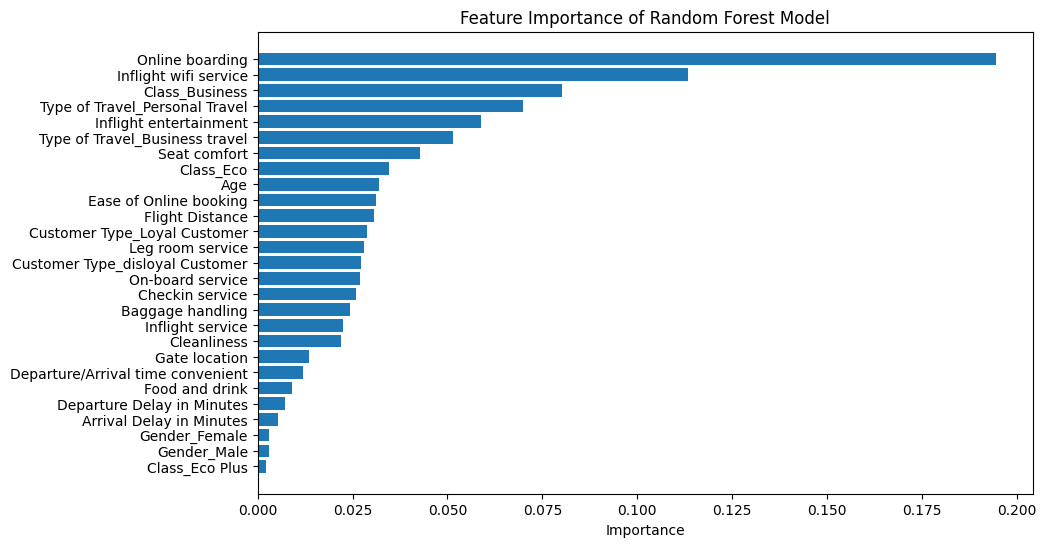

In [104]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel("")
plt.title('Feature Importance of Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

## Conclusion

-----------------------------Interpretation-----------------------------